In [24]:
import os
import sys
import matplotlib.pyplot as plt
from pyproj import CRS
from pyresample import geometry
import numpy as np

import satpy
import satpy.resample

from satpy.composites import SingleBandCompositor, GenericCompositor
from trollimage.image import Image
from satpy.writers import to_image
from trollimage.colormap import greys, gnbu
from trollimage.image import Image
from pycoast import ContourWriterAGG

sys.path.insert(0, '/home/cameron/Projects/hypso-package')

# Import Satellite Object
from hypso import Hypso1

In [2]:
dir_path = '/home/cameron/Dokumenter/Data/frohavet'
nc_file = os.path.join(dir_path, 'frohavet_2024-05-06_1017Z-l1a.nc')
points_file = os.path.join(dir_path, 'frohavet_2024-05-06_1017Z-bin3.points')

#dir_path = '/home/cameron/Dokumenter/Data/erie'
#nc_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-l1a.nc')
#points_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-bin3.points')

dir_path = '/home/cameron/Dokumenter/Data/frohavet'
nc_file = os.path.join(dir_path, 'frohavet_2024-04-26_1049Z-l1a.nc')
points_file = os.path.join(dir_path, 'frohavet_2024-04-26_1049Z-bin3.points')

In [3]:
satobj = Hypso1(hypso_path=nc_file, points_path=points_file, verbose=True)

satobj.generate_l1b_cube()
satobj.generate_land_mask(land_mask='global')


[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...
[INFO] Running global land mask generation...
[INFO] Georeferencing has already been run. Skipping.


In [4]:
satobj.generate_chlorophyll_estimates(product='band_ratio')

if False:
    model = "/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib"
    satobj.generate_chlorophyll_estimates(product="6sv1_aqua", model=model)
    satobj.get_chlorophyll_estimates(product="6sv1_aqua")

[INFO] Running band ratio chlorophyll estimation...
[INFO] Calibration has already been run. Skipping.


In [5]:
l1a_scene = satobj.get_l1a_satpy_scene()
l1b_scene = satobj.get_l1b_satpy_scene()
chl_scene = satobj.get_chlorophyll_satpy_scene()

In [6]:
chl_scene._datasets.keys()

[DataID(name='chl_band_ratio'),
 DataID(name='latitude'),
 DataID(name='longitude')]

In [16]:
scene = chl_scene
bbox = satobj.get_bbox()

area_id = 'frohavet'
proj_id = 'roi'
description = 'roi'
projection = CRS.from_proj4("+proj=latlon")
width = 500
height = 500
area_extent = bbox

area_def_1 = geometry.AreaDefinition(area_id, proj_id, description, projection,  width, height, area_extent)

In [17]:
area_def_2 = satpy.resample.get_area_def('scan')

In [18]:
area_def_1

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: frohavet
Description: roi
Projection ID: roi
Projection: {'datum': 'WGS84', 'no_defs': 'None', 'proj': 'longlat', 'type': 'crs'}
Number of columns: 500
Number of rows: 500
Area extent: (7.2254, 62.5662, 13.0617, 65.751)

In [19]:
area_def_2

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: scan
Description: Scandinavia
Projection: {'ellps': 'bessel', 'lat_0': '90', 'lat_ts': '60', 'lon_0': '14', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 512
Number of rows: 512
Area extent: (-1268854.1266, -4150234.8426, 779145.8734, -2102234.8426)

In [75]:
from pyresample import load_area
area_def = load_area("./frohavet.yaml")

In [76]:
area_def

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: frohavet
Description: Frohavet
Projection: {'ellps': 'bessel', 'lat_0': '90', 'lat_ts': '63', 'lon_0': '10', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 512
Number of rows: 512
Area extent: (-100000.0, -2950000.0, 100000.0, -2650000.0)

In [77]:
scene = chl_scene
area_def = area_def

resampled_scene = scene.resample(area_def, resampler='bilinear', fill_value=np.NaN)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


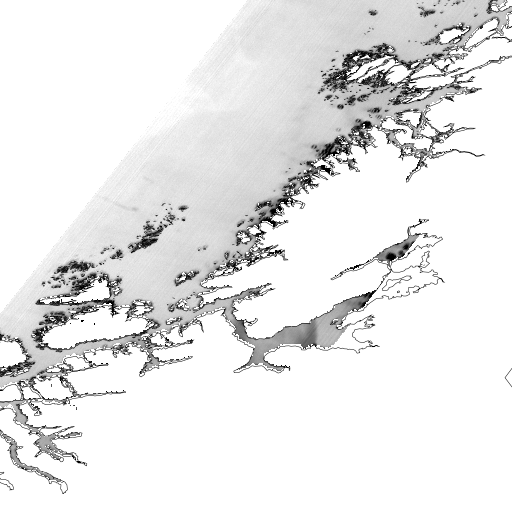

In [78]:
resampled_scene.show('chl_band_ratio', overlay={"coast_dir": '/home/cameron/Dokumenter/Pycoast'})

In [106]:
try:
    del gnbu
    from trollimage.colormap import greys, bugn
except:
    from trollimage.colormap import greys, bugn

compositor = SingleBandCompositor('chl_band_ratio')
composite = compositor([resampled_scene['chl_band_ratio'] - 1.95])

img = to_image(composite[:,:]) 

#bugn.reverse()
#greys.set_range(0, 1.92)
bugn.set_range(0, 0.2)
#my_cm = greys + bugn 
#img.colorize(my_cm)
img.colorize(bugn)
#img.show()
#img.save('./out.png')

pil_img = img.pil_image()

cw = ContourWriterAGG('/home/cameron/Dokumenter/Pycoast')
cw.add_coastlines(pil_img, area_def, resolution='f', outline='black', fill='gray')
cw.add_rivers(pil_img, area_def, level=10, outline='blue', resolution='f')
cw.add_borders(pil_img, area_def, outline=(255, 0, 0))


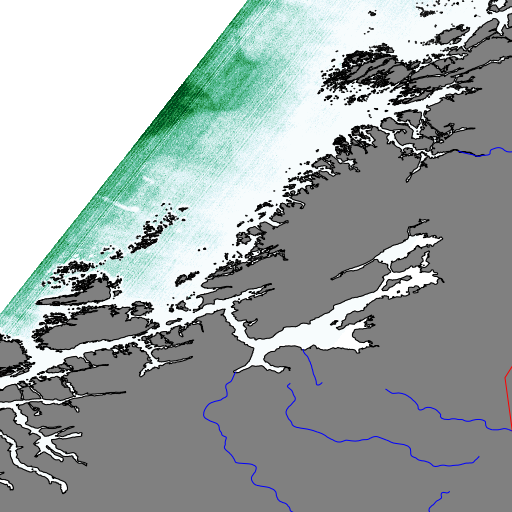

In [107]:
pil_img

In [149]:
try:
    del gnbu
    from trollimage.colormap import greys, gnbu
except:
    from trollimage.colormap import greys, gnbu

compositor = SingleBandCompositor('chl_6sv1_aqua')
composite = compositor([resampled_scene['chl_6sv1_aqua']])

img = to_image(composite[:,:]) 


#gnbu.reverse()
#greys.set_range(0, 1.92)
gnbu.set_range(0, 2)
#my_cm = greys + gnbu 
#img.colorize(my_cm)
img.colorize(gnbu)
#img.show()
#img.save('./out.png')

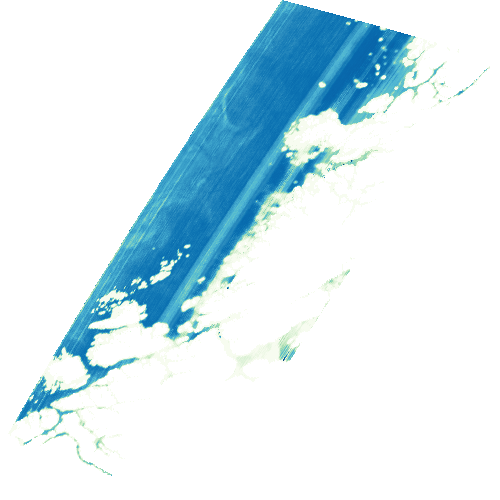

In [150]:
img

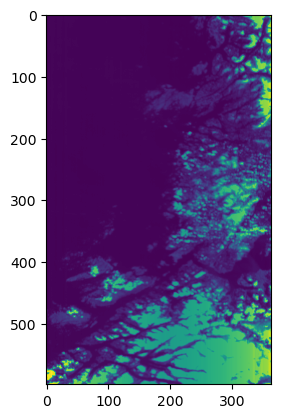

In [88]:
plt.imshow(l1b_scene['band_70'][:,::3])

In [91]:
satobj.datacube_flipped

False

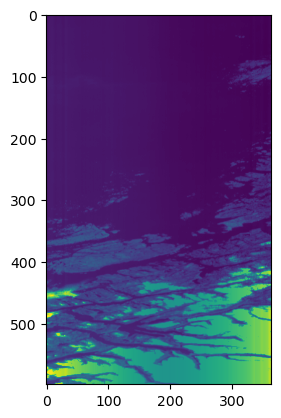

In [56]:
plt.imshow(l1b_scene['radiance_550_nm'][:,::3])


In [57]:
plt.imshow(l1b_scene['band_40'][:,::3])

KeyError: "No dataset matching 'DataQuery(name='band_40')' found"